In [12]:
import time 
import sys
from blu import *  
# True parameters
data=np.load(data_dir+'/catalog/m1m2zxeff_posterior_138_lensed.npz')
m1,m2,redshift,xeff = data['m1'],data['m2'],data['redshift'], data['xeff'] 
del data
# posterior samples 
with open('./posterior/img1_det_m1m2xeff.pkl', 'rb') as f:
    img1=dill.load(f)
with open('./posterior/img2_det_m1m2xeff.pkl', 'rb') as f:
    img2=dill.load(f)
# uniform model
with open('./pop_prior/uniform_pop_m1m2xeff.pkl', 'rb') as f:
    pop_uni=dill.load(f)
# HDPGMM models 
with open('./pop_prior/astro_m1m2chieff.pkl', 'rb') as f:
    pop_model=dill.load(f)
# benchmark model
pop_true = mix_pop('./pop_prior/real_distv3.pkl')
# power-law model (wrong)
pop_power = mix_pop('./pop_prior/PL_pdfv3.pkl',wide=True)
N = 1e4
OLU = OddsRatio(gw_pop=pop_model,Nmc=N)
OLU_true = OddsRatio(gw_pop=pop_true,Nmc=N)
OLU_pl = OddsRatio(gw_pop=pop_power,Nmc=N)
OLU_uni = OddsRatio(gw_pop=pop_uni,Nmc=N)

load_data = True 
if load_data:
    data = np.load('blu_data_125_nlog.npz')
    blu_true = data['bt']
    blu_hdpgmm = data['bh']
    blu_pl = data['bp']
    blu_uni = data['bu']

In [18]:
# only compute the blu within the reliable region of reconstructed astro population function
data=np.load(data_dir+'/catalog/m1m2zxeff_posterior_138_lensed.npz')
m1,m2,redshift,xeff = data['m1'],data['m2'],data['redshift'], data['xeff'] 
m1z = m1z=m1*(1+redshift)
m1z = m1z[:int(m1z.size/2)]
index = np.where(m1z<90)[0]

In [14]:
blu_uni=[]
blu_true=[]
blu_hdpgmm=[]
blu_pl=[]
for i in tqdm(index[:10], total = int(index[:10].size), desc = 'BLU-lensed pair'):
    blu_true.append(OLU_true.BayesFactor_PEuniform(img1[i],img2[i]))
    blu_hdpgmm.append(OLU.BayesFactor_PEuniform(img1[i],img2[i]))
    #blu_pl.append(OLU_pl.BayesFactor_PEuniform(img1[i],img2[i]))
    #blu_uni.append(OLU_uni.BayesFactor_PEuniform(img1[i],img2[i]))
    print(m1z[i])
blu_true = np.array(blu_true)
#blu_hdpgmm = np.array(blu_hdpgmm)
#blu_pl = np.array(blu_pl)
#blu_uni = np.array(blu_uni)

#blu_true = log_blu(blu_true)
#blu_hdpgmm = log_blu(blu_hdpgmm)
#blu_pl = log_blu(blu_pl)
#blu_uni = log_blu(blu_uni)


BLU-lensed pair:   0%|                                   | 0/10 [00:00<?, ?it/s]

prop blu= 137.5364586652795
error= 0.9118517019896916 2.384398894194771


BLU-lensed pair:  10%|██▋                        | 1/10 [00:09<01:28,  9.84s/it]

prop blu= 53.76093320473129
error= -3.4374965618336484 25.335123977377364
62.153631740317564
prop blu= 11.648274848968233
error= 0.19378850124470476 0.32965491563695953


BLU-lensed pair:  20%|█████▍                     | 2/10 [00:20<01:21, 10.21s/it]

prop blu= 12.583814443098898
error= -3.7110169541505 8.656234027689422
51.13147403315768
prop blu= 99.72035616955206
error= 0.47308720064347953 1.2748906791402788


BLU-lensed pair:  30%|████████                   | 3/10 [00:30<01:10, 10.08s/it]

prop blu= 7.993572719302196
error= -0.33413533756911523 1.7517704717725286
83.2078027034338
prop blu= 6.288862267508304
error= 0.42427940587693735 0.4873393657867654


BLU-lensed pair:  40%|██████████▊                | 4/10 [00:40<01:02, 10.35s/it]

prop blu= 10.902583221164932
error= 3.8315728250828256 12.436662709549717
78.04018794300828
prop blu= 3.076599655758121
error= 0.11880168693780133 0.14957429534446984


BLU-lensed pair:  50%|█████████████▌             | 5/10 [00:51<00:51, 10.32s/it]

prop blu= 1.2061046270631934
error= 0.0690140351138262 0.4126433680059697
49.731122073346
prop blu= 10.928451346781884
error= 0.15856112211286275 0.3000071940050821


BLU-lensed pair:  60%|████████████████▏          | 6/10 [01:01<00:40, 10.23s/it]

prop blu= 7.520896030862441
error= -0.4440144831296988 2.403519151056838
41.94183211428027
prop blu= 29.402047498853776
error= 0.18977610834850336 0.5781021712355823


BLU-lensed pair:  70%|██████████████████▉        | 7/10 [01:12<00:31, 10.43s/it]

prop blu= 7.332222142790325
error= -0.3451188702091608 1.585557413893639
41.548547767507976
prop blu= 184.22484136753414
error= 3.144229330252283 4.046622005090008


BLU-lensed pair:  80%|█████████████████████▌     | 8/10 [01:22<00:21, 10.51s/it]

prop blu= 23.95568862791129
error= -1.438499584142687 7.427787359555197
72.74606508459537
prop blu= 510.52709409534515
error= 3.150457427289444 6.0068146164211536


BLU-lensed pair:  90%|████████████████████████▎  | 9/10 [01:32<00:10, 10.23s/it]

prop blu= 117.42068412364623
error= -10.000455929630862 41.63560051950631
67.55547764714873
prop blu= 27.79146386964817
error= 0.41304676659870204 0.8489376081025489


BLU-lensed pair: 100%|██████████████████████████| 10/10 [01:42<00:00, 10.25s/it]

prop blu= 13.934957596724441
error= -1.2869536440653513 6.592586606624506
53.20779196139983


In [15]:
blu_hdpgmm = np.array(blu_hdpgmm)

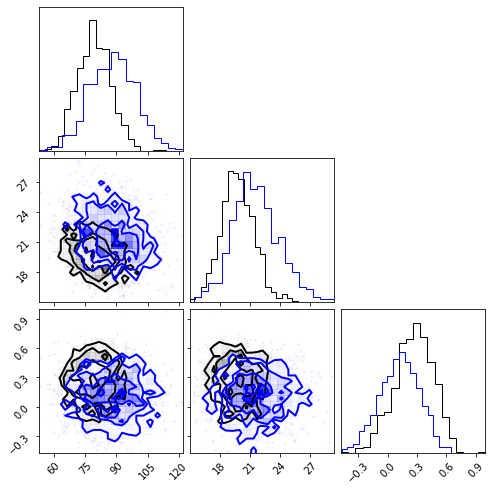

In [11]:
import corner.corner as cn
f1 = cn(img1[index[2]].rvs(1000),color='black')
f2 = cn(img2[index[2]].rvs(1000),color='blue',fig=f1)


In [4]:
np.savez('./blu_data_125nlog_v2.npz',bt=blu_true,bh=blu_hdpgmm,bu=blu_uni,bp=blu_pl)

TypeError: list indices must be integers or slices, not tuple

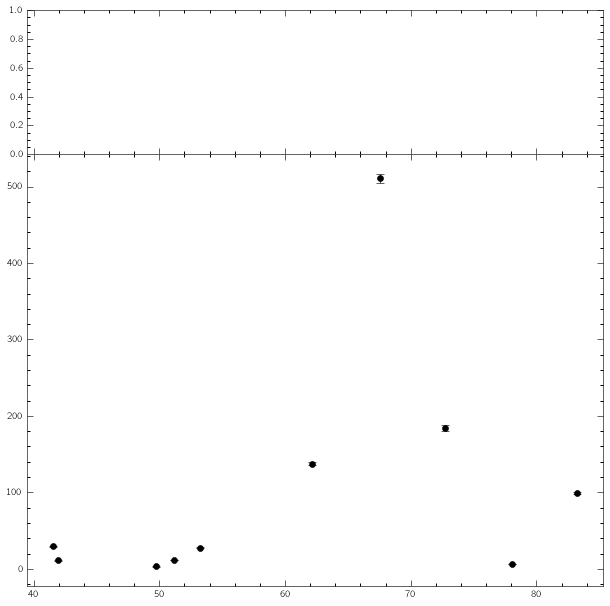

In [19]:
from marginal_plt import *
%matplotlib inline

m1z=m1z[index]
math_blu = '$ \mathcal{B}_{\mathcal{H}_{\mathrm{U}}}^{\mathcal{H}_{\mathrm{L}}}$'

z_bds  = [0.01,1.3]
lim = [15,140]
xlim=lim
ylim=(1e-2,5e3)

n = blu_true.shape[0]
#plotting_two(blu_true[:n], blu_uni[:n],pop_model,
#             pop_true,pop_power, m1z[:n],math_blu,
#             real_dist=True,uni_dist=True,xlim=xlim,ylim=ylim,scale_log=True)
#plt.savefig('blu_uni_n.pdf',bbox_inches = 'tight')
#ylim=(0,3.1)
#plotting_two(blu_true[:n], blu_pl[:n],pop_model,
#             pop_true,pop_power, m1z[:n],math_blu,
#             real_dist=True,PL_dist=True,xlim=xlim,ylim=ylim,scale_log=True)
#plt.savefig('blu_pl_n.pdf',bbox_inches = 'tight')
#ylim=(0.5,2.26)
#ylim=(0,5.1)

#plt.savefig('blu_dpgmm_n.pdf',bbox_inches = 'tight')

Astro Dists: 100%|██████████████████████████| 1000/1000 [01:48<00:00,  9.20it/s]


0.013297651415603826


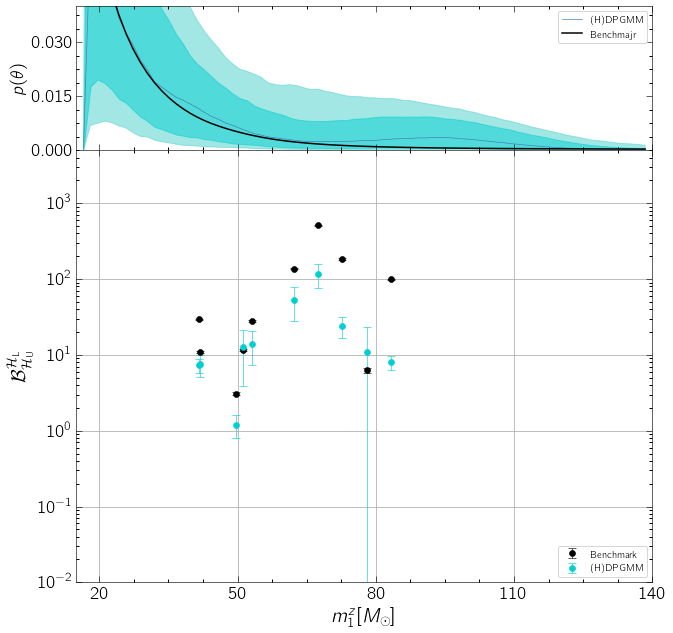

In [22]:
plotting_two(blu_true[:n], blu_hdpgmm[:n],pop_model,
             pop_true,pop_power, m1z[:n],math_blu,
             real_dist=True,HDPGMM_model=True,xlim=xlim,ylim=ylim,scale_log=True)

In [ ]:
# regular grid
plotting_two(blu_true[:n], blu_hdpgmm[:n],pop_model,
             pop_true,pop_power, m1z[:n],math_blu,
             real_dist=True,HDPGMM_model=True,xlim=xlim,ylim=ylim,scale_log=True,reg=True)